# Experiment 3
### > Aim : Implement Linear Regression to perdiction

### > Definition & Working principle
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

### > Hypothesis representation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**.

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.



In [1]:
import numpy as np

class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

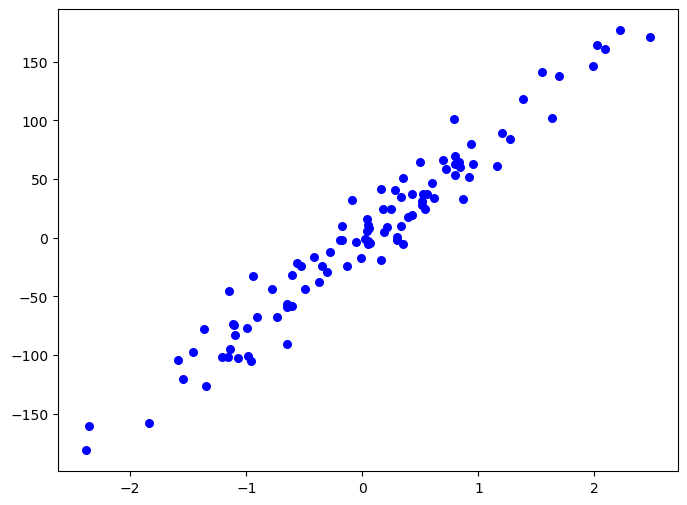

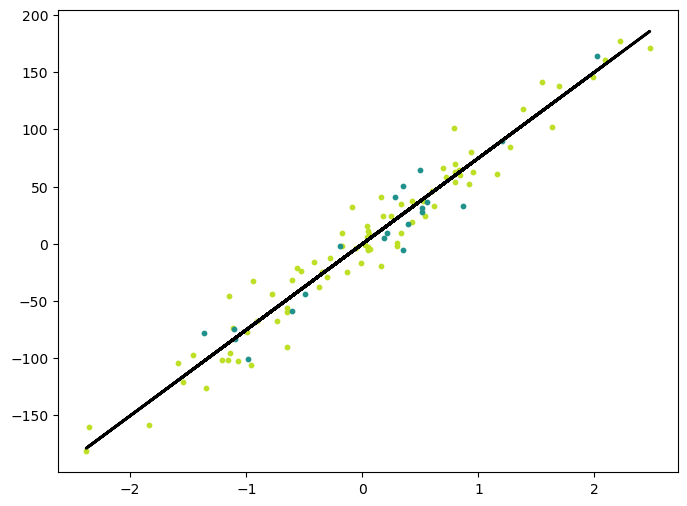

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

# reg = LinearRegression(lr=0.01)
reg = LinearRegression()

reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [3]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.465242376642488
MSE: 305.7741316228643
RMSE: 17.486398474896546
